In [28]:
#  Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sympy import Point, Line 
import seaborn as sns
import random
import math
from math import atan
from numpy import linalg as LA

# 1. Generating the Base Shape 

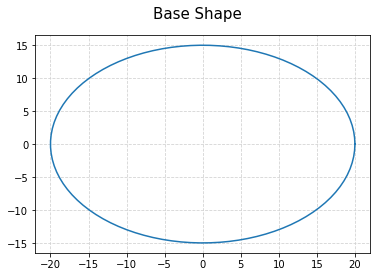

In [79]:
u=0   #x-position of the center
v=0    #y-position of the center
a=20    #radius on the x-axis
b=15    #radius on the y-axis

t = np.linspace(0, 2*math.pi, 100)
x=u+a*np.cos(t)
y=v+b*np.sin(t)
plt.plot( x,y )
plt.grid(color='lightgray',linestyle='--')
plt.suptitle('Base Shape',fontsize=15)
plt.show()


# 2. Finding Critical Points

30

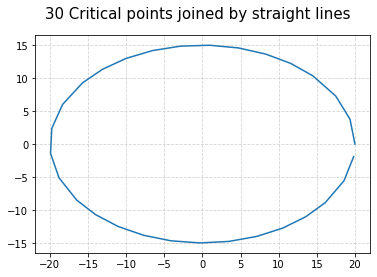

In [30]:
crit_x=[]
crit_y=[]
init=0
crit_x.append(x[0])
crit_y.append(y[0])
for i in range(100):

 M1=(y[init]-0)/x[init]
 M2=(y[i]-0)/x[i]
 
 angle = math.degrees(atan(abs((M2 - M1) / (1 + M1 * M2))))
 if angle > 9.7:
    crit_x.append(x[i])
    crit_y.append(y[i])
    init=i
plt.plot(crit_x,crit_y)
plt.grid(color='lightgray',linestyle='--')
plt.suptitle('30 Critical points joined by straight lines',fontsize=15)
len(crit_y)

# 3. Creating 20 shapes by adding random noise

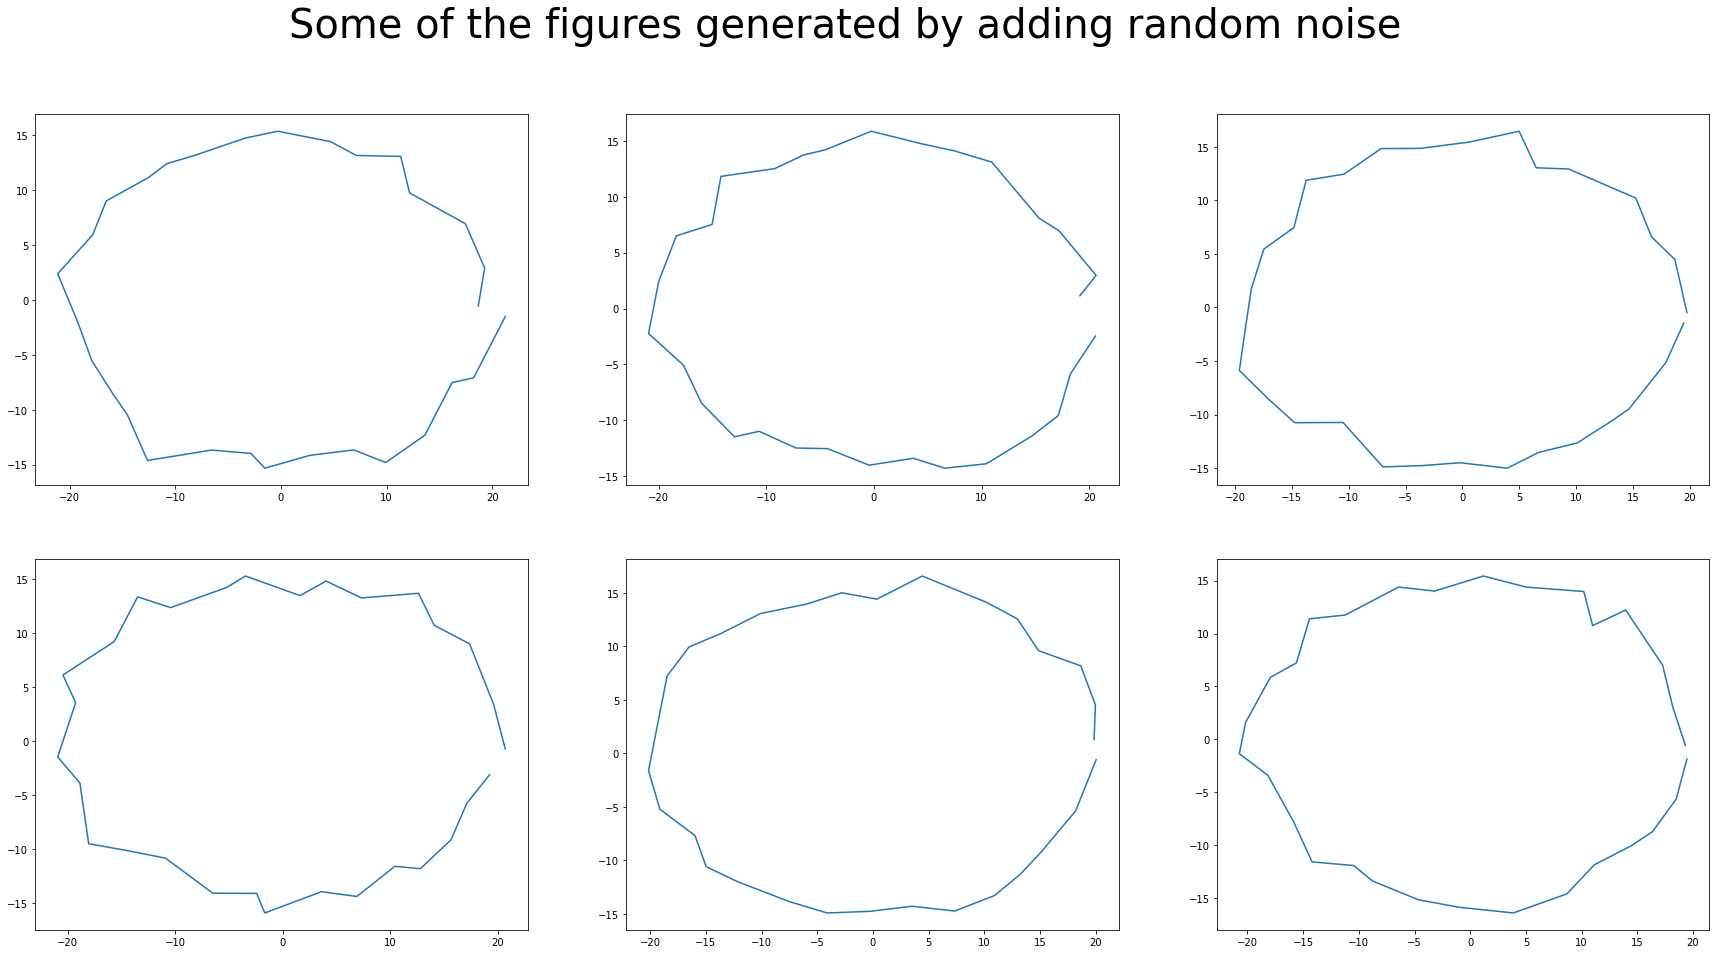

In [77]:
random.seed(17)
c=[]
for i in range(20):
    for j in range(30):
        c.append(crit_x[j]+np.random.normal(0, .8, size=1))

for i in range(20):
    for j in range(30):
        c.append(crit_y[j]+np.random.normal(0, .8, size=1)) 
random_noise=np.reshape(np.array(c),newshape=(40,30))
plt.figure(figsize=(30,15)) 
plt.suptitle('Some of the figures generated by adding random noise',fontsize=40)
plt.grid(color='lightgray',linestyle='--')
plt.subplot(2,3,1)
plt.plot(random_noise[0],random_noise[20])
plt.subplot(2,3,2)
plt.plot(random_noise[1],random_noise[21])
plt.subplot(2,3,3)
plt.plot(random_noise[2],random_noise[22])
plt.subplot(2,3,4)
plt.plot(random_noise[3],random_noise[23])
plt.subplot(2,3,5)
plt.plot(random_noise[4],random_noise[24])
plt.subplot(2,3,6)
plt.plot(random_noise[5],random_noise[25])

# 4. Obtaining the Mean Shape

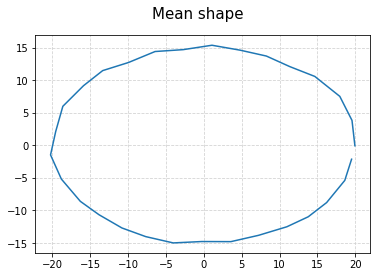

In [70]:
x_avg=np.average(random_noise[:20],axis=0)
x_avg
y_avg=np.average(random_noise[-20:],axis=0)
plt.plot(x_avg,y_avg)
plt.suptitle('Mean shape',fontsize=15)
plt.grid(color='lightgray',linestyle='--')

# 5. Covariance Matrix and its eigen vectors, eigen values for 20 shapes

In [67]:
cov=np.cov(np.reshape(np.array(c),newshape=(30,40)))
eigen_values, eigen_vectors=LA.eigh(cov)
eigen_values

array([2.91223594e-02, 5.06730437e-02, 7.70822661e-02, 8.14115208e-02,
       1.05660423e-01, 1.13225886e-01, 1.43009635e-01, 1.60336869e-01,
       1.90027806e-01, 2.66784125e-01, 3.19430206e-01, 3.74007244e-01,
       4.00743827e-01, 4.56773120e-01, 5.29305466e-01, 5.81512305e-01,
       6.22467334e-01, 7.17945919e-01, 7.79973726e-01, 8.78087303e-01,
       9.13585106e-01, 1.09216665e+00, 1.21005817e+00, 1.42554008e+00,
       1.58819968e+00, 1.66537244e+00, 3.48956136e+00, 4.25853863e+00,
       2.12829903e+03, 2.41380779e+03])

# 6. Selecting the significant eigen values for PCA

In [71]:
resized_eig_vect=np.reshape(eigen_vectors[:10],newshape=(30,10)) # no. of eigen values is taken as 10 (out of 30)

# 7. Giving different values for b (in the equation x + Pb)

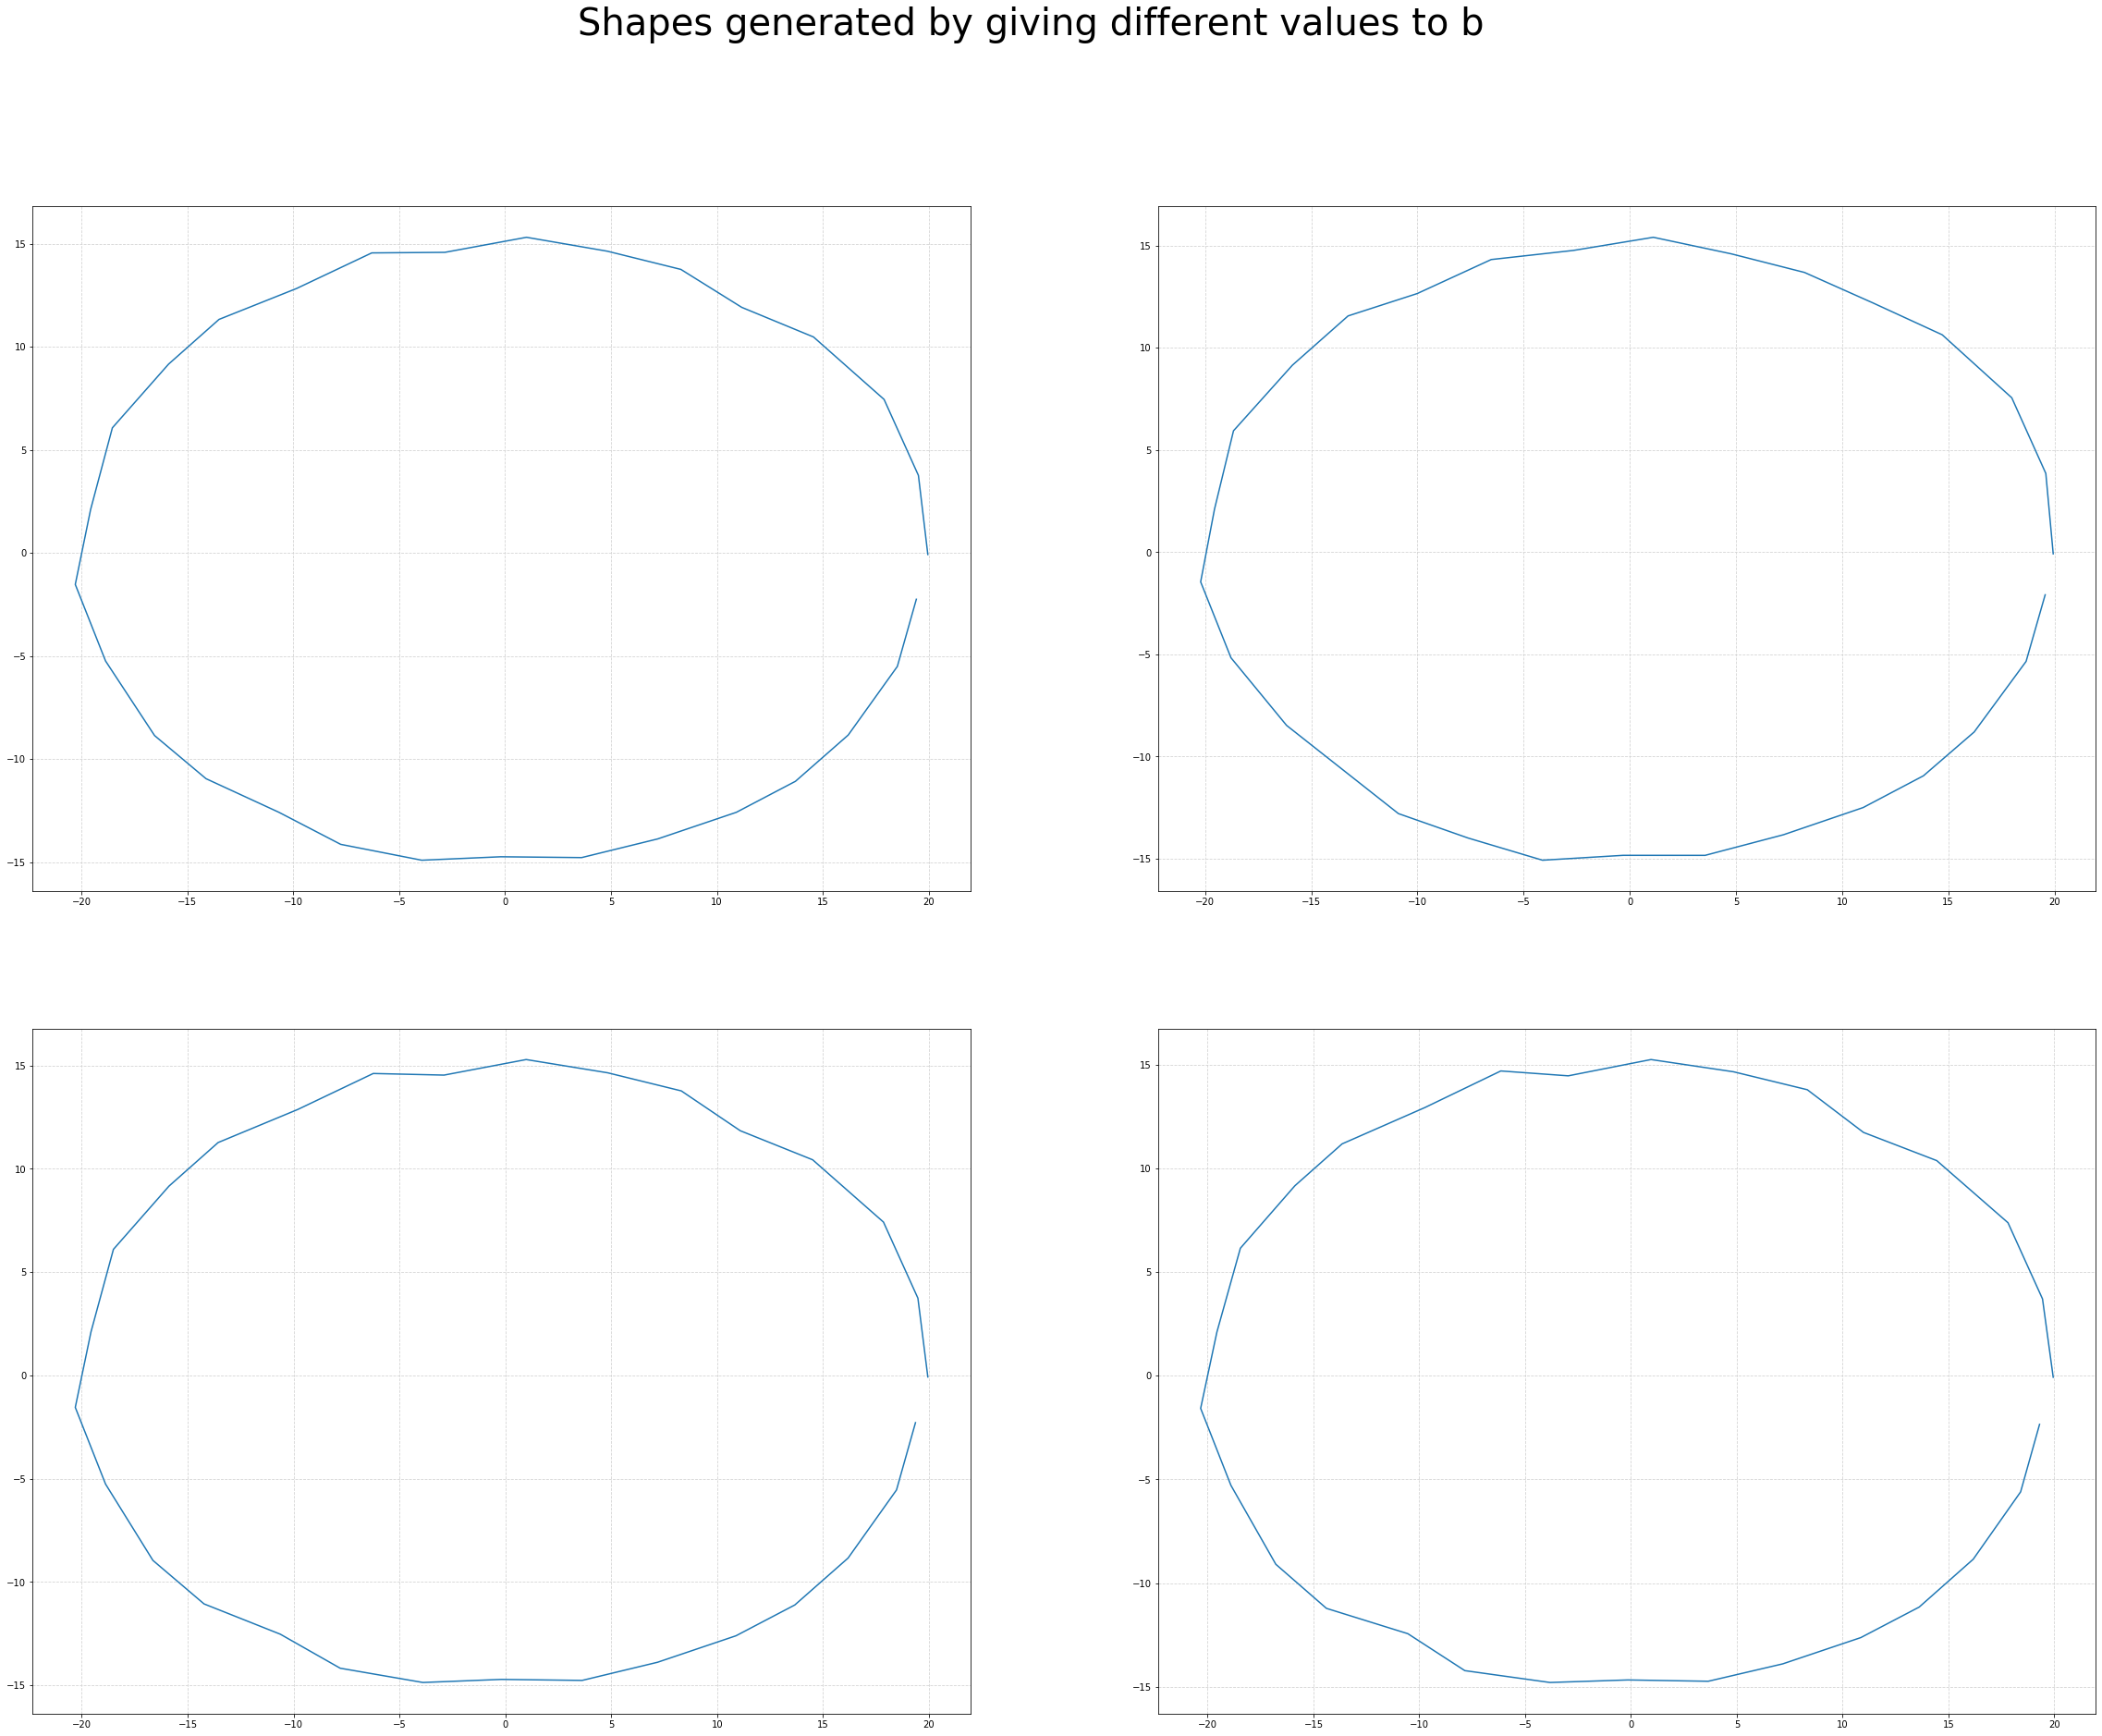

In [82]:
b_value=[0.5,-0.3,0.7,1]
plt.figure(figsize=(40,30)) 
for i in range(len(b_value)):
    
    plt.subplot(2,2,i+1)
    x_calc = x_avg + np.matmul(resized_eig_vect,b_value[i]*np.sqrt(eigen_values[:10]))
    y_calc = y_avg + np.matmul(resized_eig_vect,b_value[i]*np.sqrt(eigen_values[:10]))
    plt.grid(color='lightgray',linestyle='--')
    plt.plot(x_calc,y_calc)
    plt.suptitle('Shapes generated by giving different values to b',fontsize=40)